In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [83]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [84]:
row,cols = df.shape
print("No of rows:", row)
print("No of columns", cols)

No of rows: 1338
No of columns 7


In [85]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


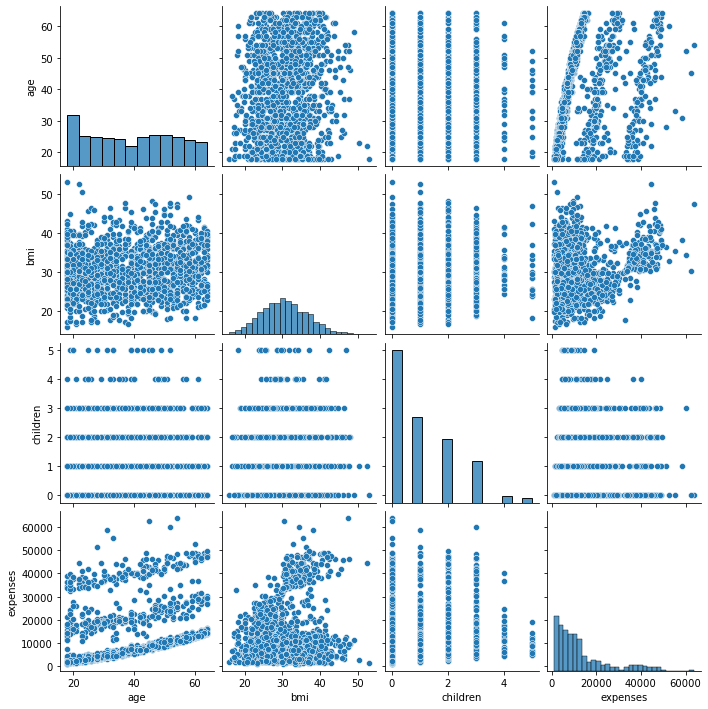

In [87]:
sns.pairplot(df)

In [88]:
# if independent variable has low correlation with dependent variable then we can remove it

df1=df[['age', 'bmi','children','expenses']]
df1.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


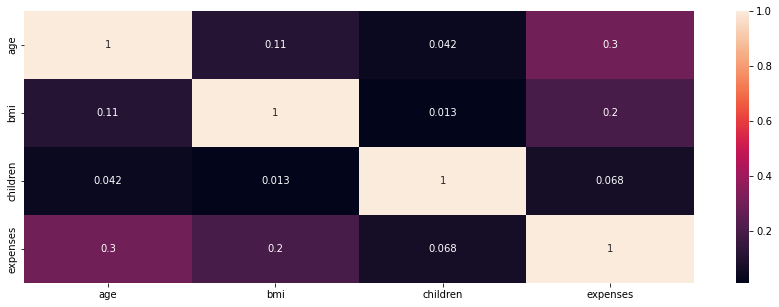

In [89]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [90]:
# Dimension Reduction

In [91]:
sex = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, sex], axis = 1)
df

,age,sex,bmi,children,smoker,region,expenses,male
0,19,female,27.9,0,yes,southwest,16884.92,0
1,18,male,33.8,1,no,southeast,1725.55,1
2,28,male,33.0,3,no,southeast,4449.46,1
3,33,male,22.7,0,no,northwest,21984.47,1
4,32,male,28.9,0,no,northwest,3866.86,1
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1
1334,18,female,31.9,0,no,northeast,2205.98,0
1335,18,female,36.9,0,no,southeast,1629.83,0
1336,21,female,25.8,0,no,southwest,2007.95,0


In [92]:
smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, smoker], axis = 1)
df

,age,sex,bmi,children,smoker,region,expenses,male,yes
0,19,female,27.9,0,yes,southwest,16884.92,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,0
4,32,male,28.9,0,no,northwest,3866.86,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1,0
1334,18,female,31.9,0,no,northeast,2205.98,0,0
1335,18,female,36.9,0,no,southeast,1629.83,0,0
1336,21,female,25.8,0,no,southwest,2007.95,0,0


In [93]:
region = pd.get_dummies(df['region'])
df = pd.concat([df,region], axis=1)
df

,age,sex,bmi,children,smoker,region,expenses,male,yes,northeast,northwest,southeast,southwest
0,19,female,27.9,0,yes,southwest,16884.92,0,1,0,0,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,0,0,0,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,0,0,0,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,0,0,1,0,0
4,32,male,28.9,0,no,northwest,3866.86,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1,0,0,1,0,0
1334,18,female,31.9,0,no,northeast,2205.98,0,0,1,0,0,0
1335,18,female,36.9,0,no,southeast,1629.83,0,0,0,0,1,0
1336,21,female,25.8,0,no,southwest,2007.95,0,0,0,0,0,1


In [94]:
df.drop(['sex','smoker','region'],axis = 1,inplace = True)
df

,age,bmi,children,expenses,male,yes,northeast,northwest,southeast,southwest
0,19,27.9,0,16884.92,0,1,0,0,0,1
1,18,33.8,1,1725.55,1,0,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,0,1,0
3,33,22.7,0,21984.47,1,0,0,1,0,0
4,32,28.9,0,3866.86,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,0,1,0,0
1334,18,31.9,0,2205.98,0,0,1,0,0,0
1335,18,36.9,0,1629.83,0,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,0,1


In [95]:
df.corr()

,age,bmi,children,expenses,male,yes,northeast,northwest,southeast,southwest
age,1.000000,0.109341,0.042469,0.299008,-0.020856,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109341,1.000000,0.012645,0.198576,0.046380,0.003968,-0.138091,-0.135992,0.270144,-0.006398
children,0.042469,0.012645,1.000000,0.067998,0.017163,0.007673,-0.022808,0.024806,-0.023066,0.021914
expenses,0.299008,0.198576,0.067998,1.000000,0.057292,0.787251,0.006349,-0.039905,0.073982,-0.043210
male,-0.020856,0.046380,0.017163,0.057292,1.000000,0.076185,-0.002425,-0.011156,0.017117,-0.004184
yes,-0.025019,0.003968,0.007673,0.787251,0.076185,1.000000,0.002811,-0.036945,0.068498,-0.036945
northeast,0.002475,-0.138091,-0.022808,0.006349,-0.002425,0.002811,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.135992,0.024806,-0.039905,-0.011156,-0.036945,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270144,-0.023066,0.073982,0.017117,0.068498,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006398,0.021914,-0.043210,-0.004184,-0.036945,-0.320177,-0.320829,-0.346265,1.000000


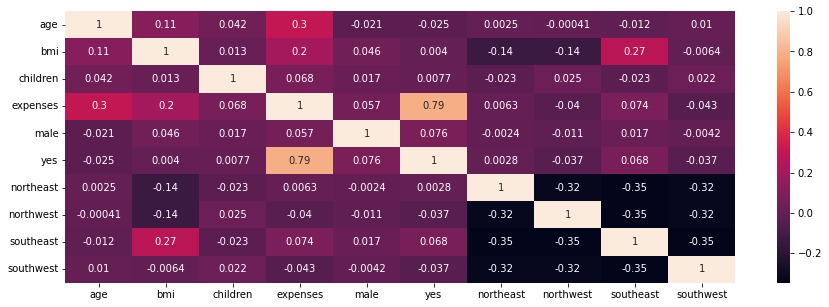

In [96]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [97]:
df.drop(['male','children','northeast','northwest','southwest'],axis=1,inplace=True)
df

,age,bmi,expenses,yes,southeast
0,19,27.9,16884.92,1,0
1,18,33.8,1725.55,0,1
2,28,33.0,4449.46,0,1
3,33,22.7,21984.47,0,0
4,32,28.9,3866.86,0,0
...,...,...,...,...,...
1333,50,31.0,10600.55,0,0
1334,18,31.9,2205.98,0,0
1335,18,36.9,1629.83,0,1
1336,21,25.8,2007.95,0,0


In [106]:
df['expenses'] = df['expenses'].astype(int)
df

,age,bmi,expenses,yes,southeast
0,19,27.9,16884,1,0
1,18,33.8,1725,0,1
2,28,33.0,4449,0,1
3,33,22.7,21984,0,0
4,32,28.9,3866,0,0
...,...,...,...,...,...
1333,50,31.0,10600,0,0
1334,18,31.9,2205,0,0
1335,18,36.9,1629,0,1
1336,21,25.8,2007,0,0


In [107]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.85, test_size = 0.15, random_state = 1)

In [108]:
y_train = df_train['expenses']
X_train = df_train.drop(['expenses'],axis = 1)

In [109]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [110]:
#train acc
print("Linear regression = ",round(lr_model.score(X_train, y_train)*100))

Linear regression =  75


In [111]:
#test acc
y_test = df_test['expenses']
X_test = df_test.drop(['expenses'],axis = 1)
print("Linear regression = ",round(lr_model.score(X_test, y_test)*100))

Linear regression =  74


In [112]:
# # for linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

# #for logistic regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg_model = lg.fit(X_train, y_train)

# # # # # # #for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X_train)
# Y_poly = poly_reg.fit_transform(y_train)
pol_reg = LinearRegression()
model = pol_reg.fit(X_poly, y_train)
# poly_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
#train acc
print("Linear regression = ",round(lr_model.score(X_train, y_train)*100))
print("Logistic regression = ",lg_model.score(X_train, y_train)*100)
print("Polynomial regression = ",pol_reg.score(poly_reg.fit_transform(X_train), y_train)*100)



Linear regression =  75
Logistic regression =  4.749340369393139
Polynomial regression =  85.51607371500697


In [114]:
#test acc
print("Linear regression = ",round(lr_model.score(X_test, y_test)*100))
print("Logistic regression = ",lg_model.score(X_test, y_test)*100)
print("Polynomial regression = ",pol_reg.score(poly_reg.fit_transform(X_test), y_test)*100)



Linear regression =  74
Logistic regression =  0.0
Polynomial regression =  85.84960807170981
